# Clustering jerárquico y dendogramas

Notaciones:
* X dataset (array n x m)
* n número de datos
* m número de rasgos
* Z array de enlace del cluster con la información de las uniones
* k número de clusters

In [1]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
import numpy as np
from scipy.spatial.distance import pdist


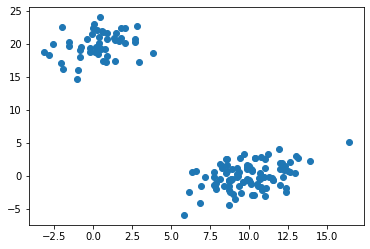

In [2]:
np.random.seed(4711)

#random.multivariate_normal(mean, cov, size=None, check_valid='warn', tol=1e-8)
a= np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size= [100,])
b= np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size= [50,])
X= np.concatenate((a, b))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [3]:
Z= linkage(X, "ward")

In [4]:
c, coph_dist= cophenet(Z, pdist(X))
c

0.9800148387574268

In [5]:
Z[0]

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

In [6]:
Z[1]

array([1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00])

In [7]:
Z[152-len(X)]    #Cluster 152
Z[158-len(X)]    #Cluster 158

array([15.        , 69.        ,  0.11428971,  2.        ])

In [8]:
X[[33, 62, 68]]

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

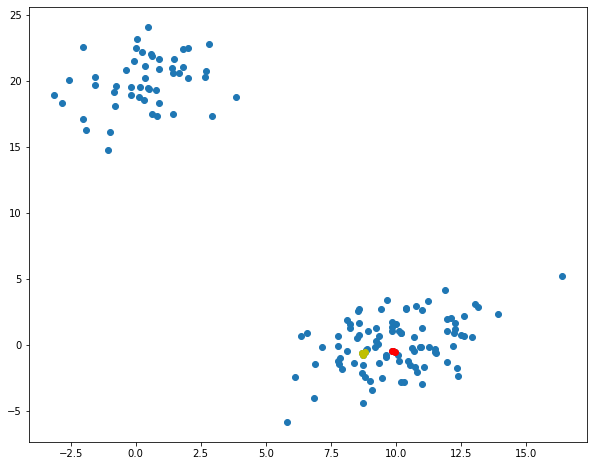

In [9]:
idx= [33, 62, 68]
idx2= [15, 69, 41]
plt.figure(figsize= (10, 8))
plt.scatter(X[:, 0], X[:, 1])  #Pintar todos los puntos.
plt.scatter(X[idx, 0], X[idx, 1], c= 'r')  #Destacamos en rojo los puntos de interés
plt.scatter(X[idx2, 0], X[idx2, 1], c= 'y')  #Destacamos en amarillo los otros puntos de interés
plt.show()

## Representación gráfica de un Dendrograma

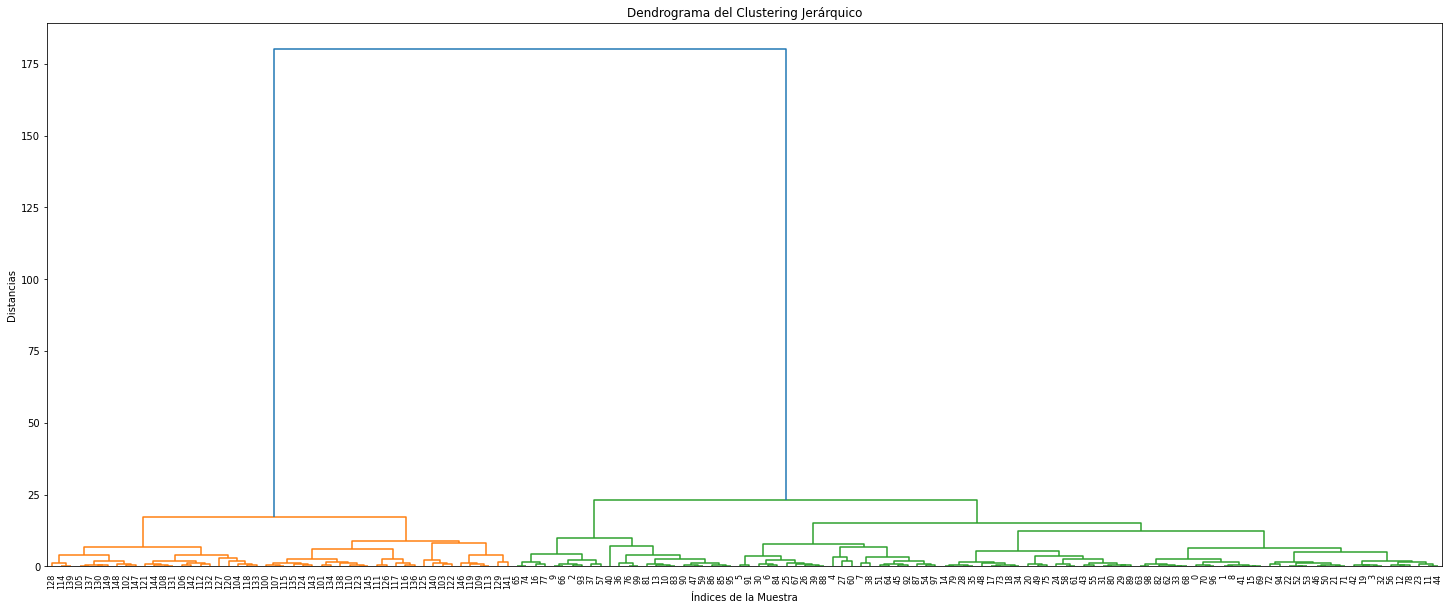

In [10]:
plt.figure(figsize= (25, 10))
plt.title("Dendrograma del Clustering Jerárquico")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation= 90., leaf_font_size= 8., color_threshold= 0.7*180)
plt.show()

In [11]:
Z[-4:,]

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

### Truncar el dendrograma

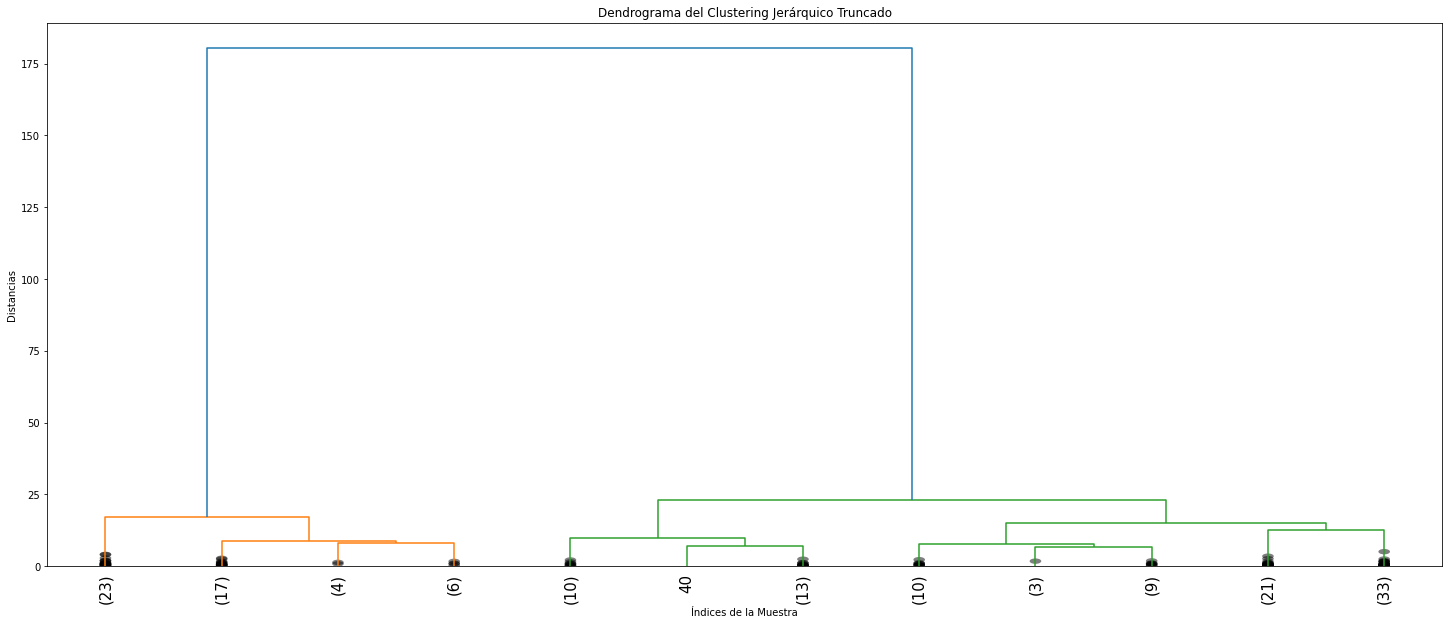

In [12]:
plt.figure(figsize= (25, 10))
plt.title("Dendrograma del Clustering Jerárquico Truncado")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation= 90., leaf_font_size= 15., color_threshold= 0.7*180, truncate_mode= 'lastp', p= 12, show_leaf_counts= True, show_contracted= True)
plt.show()

### Dendrograma personalizado

In [13]:
def dendrogram_tune(*args, **kwargs):
    max_d= kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold']= max_d
    annotate_above= kwargs.pop('annotate_above', 0)
    
    ddata= dendrogram(*args, **kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title("Dendrograma del Clustering Jerárquico Truncado")
        plt.xlabel("Índices del Dataset (o tamaño del cluster)")
        plt.ylabel("Distancia")
        for index, distance, color in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x= 0.5 * sum(index[1:3])
            y= distance[1]
            if y> annotate_above:
                plt.plot(x, y, 'o', c= color)
                plt.annotate('%.3g'%y, (x, y), xytext= (0,-5),
                            textcoords= 'offset points', va= 'top', ha= 'center')
    
    if max_d:
        plt.axhline(y= max_d, c= 'k')
        
    return ddata

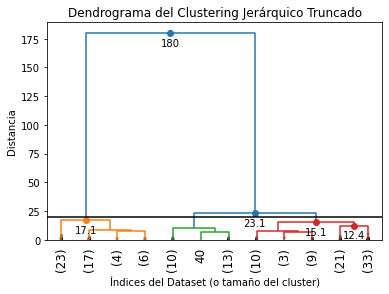

In [14]:
dendrogram_tune(Z, truncate_mode= 'lastp', p= 12, leaf_rotation= 90., leaf_font_size= 12.,
               show_contracted= True, annotate_above= 10, max_d=20)
plt.show()

### Corte automático del dendrograma

Inconsistency_i= (h_i-avg(h_j)/std(h_j)

In [15]:
from scipy.cluster.hierarchy import inconsistent

In [16]:
depth= 3
incons= inconsistent(Z, depth)
incons #Entrega el promedio, la desviación estandar, el número de elementos y el factor
# de inconsistencia para cada una de las uniones.

array([[4.15105485e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.91375926e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.10677929e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.13712071e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.54313099e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.09277896e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.10071548e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.13022407e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.14289714e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.21200766e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.21671017e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.24900190e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.40277358e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.21833664e-01, 7.17937830e-02, 2.00000000e

### Método del Codo

Busca el step del cluster donde la aceleración del crecimiento de las distancias es mayor.

[180.27043021  23.12198936  17.11527362  15.11533118  12.42734657
   9.84427829   8.74822275   8.04935282   7.86878542   7.11106083]


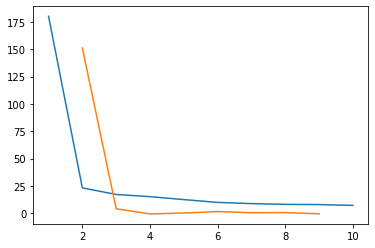

El número óptimo de cluster es 2


In [17]:
last= Z[-10:, 2]
last_rev= last[::-1]
print(last_rev)
idx= np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc= np.diff(last, 2)
acc_rev= acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k= acc_rev.argmax() + 2
print("El número óptimo de cluster es %s" %str(k))

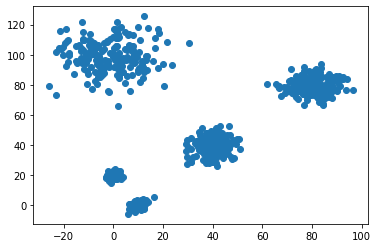

In [18]:
c= np.random.multivariate_normal([40, 40], [[20, 1], [1, 30]], size=[200,])
d= np.random.multivariate_normal([80, 80], [[30, 1], [1, 30]], size=[200,])
e= np.random.multivariate_normal([0, 100], [[100, 1], [1, 100]], size=[200,])
X2= np.concatenate((X, c, d, e), )
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [19]:
Z2= linkage(X2, "ward")

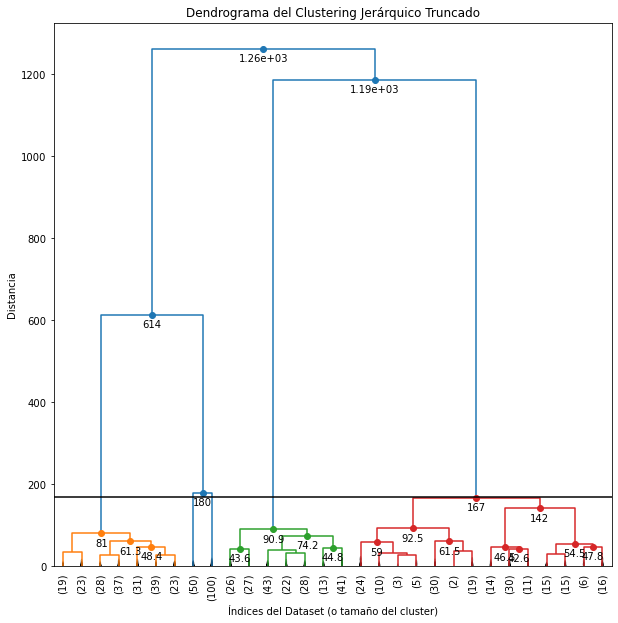

In [20]:
plt.figure(figsize=(10, 10))
dendrogram_tune(
Z2,
truncate_mode= "lastp",
p=30,
leaf_rotation= 90,
leaf_font_size= 10,
show_contracted= True,
annotate_above= 40,
max_d= 170
)

plt.show()

[1262.52130994 1186.7588235   614.06504667  180.27043021  166.66434658
  141.92437181   92.54599212   90.91214341   80.96733501   74.17015312]


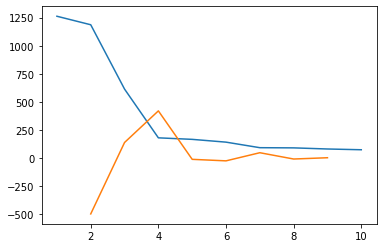

El número óptimo de cluster es 4


In [21]:
last= Z2[-10:, 2]
last_rev= last[::-1]
print(last_rev)
idx= np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc= np.diff(last, 2)
acc_rev= acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k= acc_rev.argmax() + 2
print("El número óptimo de cluster es %s" %str(k))

In [22]:
print(inconsistent(Z2, 5)[-10:])

[[ 13.99221995  15.56655759  30.           3.8658472 ]
 [ 16.73940735  18.56390061  30.           3.45982932]
 [ 19.05945013  20.53210626  31.           3.49952861]
 [ 19.25573887  20.8265769   29.           3.51907342]
 [ 21.36116189  26.77659523  30.           4.50255938]
 [ 36.58100874  37.08602393  31.           3.50761079]
 [ 12.12200256  32.15467931  30.           5.22936105]
 [ 42.61369802 111.38576865  31.           5.13038026]
 [ 81.75198678 208.31582073  31.           5.30447871]
 [147.25602023 307.95700562  31.           3.62149673]]


In [23]:
from scipy.cluster.hierarchy import fcluster

In [24]:
#Se puede separar por distancias
max_d= 20
clusters= fcluster(Z, max_d, criterion= 'distance')
clusters    #entrega un vector donde se indica si ese elemento correspondería al cluster 1, 2 o 3 para este caso

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [25]:
#Se puede separar por número de clusters
k=3
clusters= fcluster(Z, k, criterion= 'maxclust')
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [28]:
#Se puede utilizar el método de la inconsistencia
clusters2= fcluster(Z, 8, depth= 10)
clusters2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

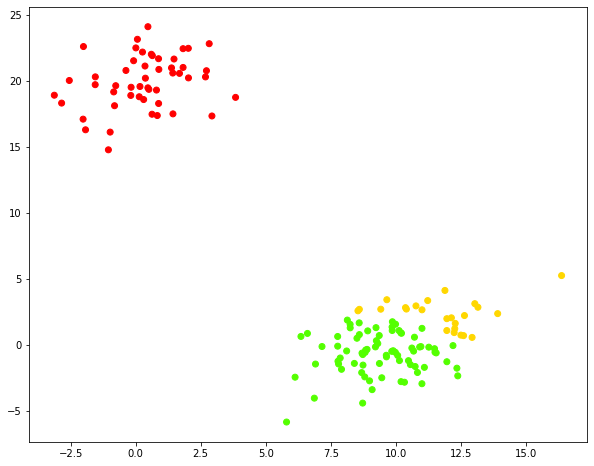

In [27]:
#Graficamos los 3 clusters
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c= clusters, cmap= 'prism')
plt.show()

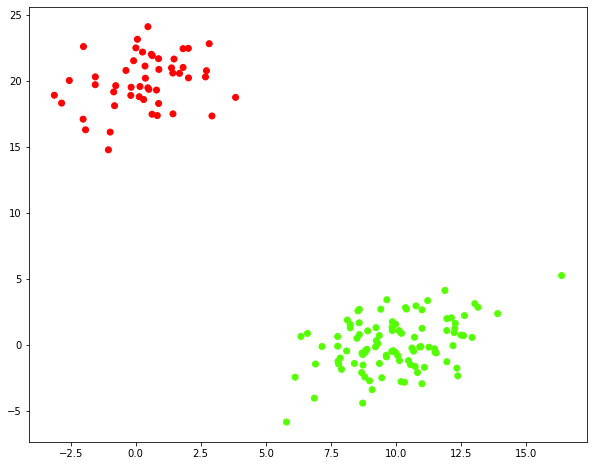

In [29]:
#Podemos ver con los 2 clusters
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c= clusters2, cmap= 'prism')
plt.show()

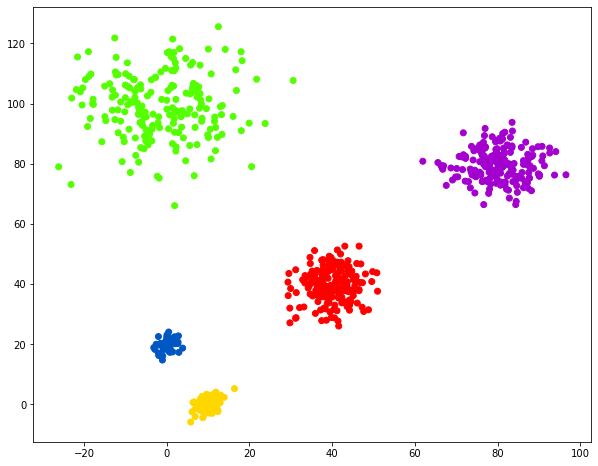

In [30]:
max_d= 170
clusters= fcluster(Z2, max_d, criterion= 'distance')

plt.figure(figsize=(10, 8))
plt.scatter(X2[:,0], X2[:,1], c= clusters, cmap= 'prism')
plt.show()